In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
train_df = pd.read_csv('howpop_train.csv')
test_df = pd.read_csv('howpop_test.csv')
print('//////////////////////////////////////////////////////////////////')
print(train_df.head())
print('/////////////////////////////////////////////////////////////////')
print(test_df.head())

//////////////////////////////////////////////////////////////////
                                url        domain  post_id  \
0  https://habrahabr.ru/post/18284/  habrahabr.ru    18284   
1  https://habrahabr.ru/post/18285/  habrahabr.ru    18285   
2  https://habrahabr.ru/post/18286/  habrahabr.ru    18286   
3  https://habrahabr.ru/post/18291/  habrahabr.ru    18291   
4  https://geektimes.ru/post/18294/  geektimes.ru    18294   

             published      author     flow  polling  content_len  \
0  2008-01-01 18:19:00      @Tapac  develop    False         4305   
1  2008-01-01 18:30:00  @DezmASter   design    False         7344   
2  2008-01-01 18:34:00  @DezmASter   design    False         8431   
3  2008-01-02 01:32:00    @Taoorus   design    False         5662   
4  2008-01-02 14:34:00    @dennydo      NaN    False         3706   

                                               title  comments  favs  views  \
0     Новогодний подарок блоггерам — WordPress 2.3.2         0    

In [3]:
train_df = pd.read_csv('howpop_train.csv')
test_df = pd.read_csv('howpop_test.csv')
print('//////////////////////////////////////////////////////////////////')
print(train_df.head(1).T)
print('/////////////////////////////////////////////////////////////////')
print(test_df.head(1).T)

//////////////////////////////////////////////////////////////////
                                                               0
url                             https://habrahabr.ru/post/18284/
domain                                              habrahabr.ru
post_id                                                    18284
published                                    2008-01-01 18:19:00
author                                                    @Tapac
flow                                                     develop
polling                                                    False
content_len                                                 4305
title             Новогодний подарок блоггерам — WordPress 2.3.2
comments                                                       0
favs                                                           0
views                                                        236
votes_plus                                                   0.0
votes_minus            

In [4]:
print('Тестовый набор: \t', test_df.shape)
print('Обучающая выборка: \t', train_df.shape)

Тестовый набор: 	 (3990, 9)
Обучающая выборка: 	 (134137, 17)


In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Ряд с датами столбца published
0   2008-01-01 18:19:00
1   2008-01-01 18:30:00
2   2008-01-01 18:34:00
3   2008-01-02 01:32:00
4   2008-01-02 14:34:00
Name: published, dtype: datetime64[ns]
Размер объекта Series:  (134137, 17)


<Axes: >

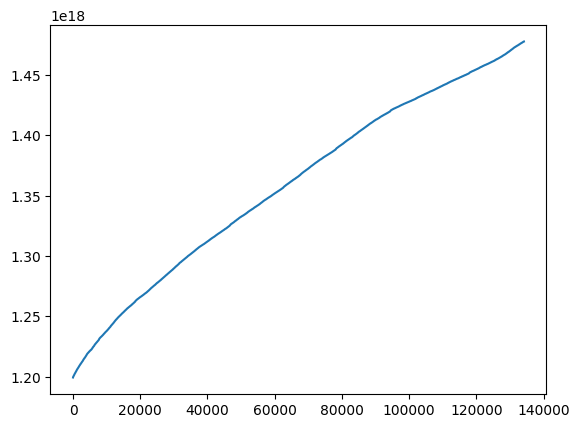

In [6]:
ser_data = train_df['published'].apply(lambda ts: pd.to_datetime(ts))
print('Ряд с датами столбца published')
print(ser_data.head())
print("Размер объекта Series: ", train_df.shape)
ser_data.apply(lambda el: el.value).plot()

In [7]:
corr = train_df.corr(numeric_only=True)
corr

,post_id,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
post_id,1.000000,0.081628,0.241384,-0.147763,0.089313,0.132385,-0.187885,-0.235594,-0.010376,-0.005845,-0.001605
polling,0.081628,1.000000,-0.003337,0.042605,0.006882,0.025660,-0.033505,0.027116,-0.003523,-0.036385,0.071417
content_len,0.241384,-0.003337,1.000000,-0.023544,0.308194,0.204101,0.068779,-0.078686,0.246063,0.356481,0.073132
comments,-0.147763,0.042605,-0.023544,1.000000,0.164166,0.290035,0.613961,0.457638,0.349568,0.278942,0.662740
favs,0.089313,0.006882,0.308194,0.164166,1.000000,0.634304,0.416241,0.062877,0.456097,0.587982,0.263239
views,0.132385,0.025660,0.204101,0.290035,0.634304,1.000000,0.396849,0.128654,0.585105,0.406782,0.326427
votes_plus,-0.187885,-0.033505,0.068779,0.613961,0.416241,0.396849,1.000000,0.464168,0.414232,0.449712,0.525081
votes_minus,-0.235594,0.027116,-0.078686,0.457638,0.062877,0.128654,0.464168,1.000000,0.146609,0.088226,0.355458
views_lognorm,-0.010376,-0.003523,0.246063,0.349568,0.456097,0.585105,0.414232,0.146609,1.000000,0.688811,0.546530
favs_lognorm,-0.005845,-0.036385,0.356481,0.278942,0.587982,0.406782,0.449712,0.088226,0.688811,1.000000,0.479476


In [8]:
corr[corr>0.9].replace({np.nan : ''})

,post_id,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
post_id,1.0,,,,,,,,,,
polling,,1.0,,,,,,,,,
content_len,,,1.0,,,,,,,,
comments,,,,1.0,,,,,,,
favs,,,,,1.0,,,,,,
views,,,,,,1.0,,,,,
votes_plus,,,,,,,1.0,,,,
votes_minus,,,,,,,,1.0,,,
views_lognorm,,,,,,,,,1.0,,
favs_lognorm,,,,,,,,,,1.0,


In [9]:
df = train_df.copy()
df['published'] = pd.to_datetime(df['published']).dt.year
ss = df['published'].value_counts()
print(ss.sort_index())

published
2008     7743
2009    10783
2010    13091
2011    15063
2012    15972
2013    15537
2014    16180
2015    23452
2016    16316
Name: count, dtype: int64


In [10]:
features = ['author', 'flow', 'domain','title']
train_size = int(0.7 * train_df.shape[0])
print('Размер исходного набора: ', len(train_df),
      '\nРазмер обучающей подвыборки: ', train_size)
x, y = train_df[features], train_df['favs_lognorm']
X_test = test_df[features]
X_train, X_valid = x[:train_size], x[train_size:]
y_train, y_valid = y[:train_size], y[train_size:]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1,3))
X_train_title = vectorizer_title.fit_transform(X_train['title'])
print('vX_train_title.vocabulary_: ', len(vectorizer_title.vocabulary_))
X_valid_title = vectorizer_title.transform(X_valid['title'])
print('vX_train_title.vocabulary_:', len(vectorizer_title.vocabulary_))
X_test_title = vectorizer_title.transform(X_test['title'])
print('vX_train_title.vocabulary_:', len(vectorizer_title.vocabulary_))
print('X_train_title.shape:', X_train_title.shape)
print('X_valid_title.shape:', X_valid_title.shape)

Размер исходного набора:  134137 
Размер обучающей подвыборки:  93895
vX_train_title.vocabulary_:  50624
vX_train_title.vocabulary_: 50624
vX_train_title.vocabulary_: 50624
X_train_title.shape: (93895, 50624)
X_valid_title.shape: (40242, 50624)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_title_ch = TfidfVectorizer(analyzer='char')
vectorizer_title_ch = CountVectorizer()

vX_train_title_ch = vectorizer_title_ch.fit_transform(X_train['title'])
print('vX_train_title_ch.vocabulary_:', len(vectorizer_title_ch.vocabulary_))

vX_valid_title_ch = vectorizer_title_ch.transform(X_valid['title'])
print('vX_valid_title_ch:', vX_valid_title_ch.shape)

vX_test_title_ch = vectorizer_title_ch.transform(X_test['title'])
print('vX_test_title_ch:', vX_test_title_ch.shape)

X_train_title_ch = vectorizer_title_ch.fit_transform(X_train['title'])
print('X_train_title_ch.shape: ', X_train_title_ch.shape)
X_valid_title_ch = vectorizer_title_ch.transform(X_valid['title'])
print('X_valid_title_ch.shape: ', X_valid_title_ch.shape)
X_test_title_ch = vectorizer_title_ch.transform(X_test['title'])
print('X_test_title_ch.shape: ', X_test_title_ch.shape)

vX_train_title_ch.vocabulary_: 77566
vX_valid_title_ch: (40242, 77566)
vX_test_title_ch: (3990, 77566)
X_train_title_ch.shape:  (93895, 77566)
X_valid_title_ch.shape:  (40242, 77566)
X_test_title_ch.shape:  (3990, 77566)


In [14]:
from sklearn.feature_extraction import DictVectorizer

feats = ['author', 'flow', 'domain']
tmp_dict_train = X_train[feats].fillna('-').T.to_dict().values()
tmp_dict_valid = X_valid[feats].fillna('-').T.to_dict().values()
tmp_dict_test = X_test[feats].fillna('-').T.to_dict().values()

X_train_feats = vectorizer_feats.fit_transform(tmp_dict_train)
X_valid_feats = vectorizer_feats.transform(tmp_dict_valid)
X_test_feats = vectorizer_feats.transform(tmp_dict_test)

print(X_train_feats.shape)
print(X_valid_feats.shape)
print(X_test_feats.shape)

(93895, 17869)
(40242, 17869)
(3990, 17869)


In [15]:
X_train_new = scipy.sparse.hstack([X_train_title,\
                                   X_train_feats,\
                                   X_train_title_ch])
X_valid_new = scipy.sparse.hstack([X_valid_title,\
                                   X_valid_feats,\
                                   X_valid_title_ch])
X_test_new = scipy.sparse.hstack([X_test_title,\
                                  X_test_feats,\
                                  X_test_title_ch])
print(X_train_new.shape)
print(X_valid_new.shape)
print(X_test_new.shape)

(93895, 146059)
(40242, 146059)
(3990, 146059)


In [16]:
%%time
model_1 = Ridge(alpha=.1, random_state=1)
model_1.fit(X_train_new, y_train)

CPU times: total: 26.3 s
Wall time: 10.3 s


Ridge(alpha=0.1, random_state=1)

In [17]:
train_preds1 = model_1.predict(X_train_new)
valid_preds1 = model_1.predict(X_valid_new)
print('Ошибка на трейне: ', mean_squared_error(y_train, train_preds1))
print('Ошибка на тесте: ', mean_squared_error(y_valid, valid_preds1))

Ошибка на трейне:  0.04157613675886106
Ошибка на тесте:  1.1796580720726937


In [18]:
%%time
model_2 = Ridge(alpha=1.0, random_state=1)
model_2.fit(X_train_new, y_train)

CPU times: total: 6.67 s
Wall time: 3.42 s


Ridge(random_state=1)

In [19]:
train_preds2 = model_2.predict(X_train_new)
valid_preds2 = model_2.predict(X_valid_new)
print('Ошибка на трейне: ', mean_squared_error(y_train, train_preds2))
print('Ошибка на тесте: ', mean_squared_error(y_valid, valid_preds2))

Ошибка на трейне:  0.14687334675989266
Ошибка на тесте:  0.7890890272507068
